In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
%matplotlib inline
from matplotlib import pyplot as plt

# 神经元

output = f(w * x + b), 其中 f 是非线性的激活函数.

# 使用 torch.nn 中的线性正向传播模型和损失函数

In [2]:
# recorded temperature data, c - celsius, u - unknown
t_cel = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_cel = torch.tensor(t_cel)
t_u = torch.tensor(t_u)
t_un = t_u * 0.1

In [3]:
t_cel.unsqueeze_(1) # <1>
t_u.unsqueeze_(1) # <1>

tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_cel = t_cel[train_indices]
val_t_u = t_u[val_indices]
val_t_cel = t_cel[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [5]:
#def model(t_un, w2, w1, b):
#    return w2 * t_un**2 + w1 * t_un + b
linear_model = nn.Linear(1, 1)
linear_model(val_t_un) # <1>

list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9288]], requires_grad=True),
 Parameter containing:
 tensor([0.6164], requires_grad=True)]

In [6]:
#def loss_fn(t_cel, t_p):
#    squared_loss = (t_cel - t_p) ** 2
#    return squared_loss.mean()

In [7]:
def training_loop(n_epochs, train_t_un, train_t_cel, val_t_un, val_t_cel, model, loss_fn, optimizer):

    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_un)
        train_loss = loss_fn(train_t_cel, train_t_p)
        with torch.no_grad():
            val_t_p = model(val_t_un)
            val_loss = loss_fn(val_t_cel, val_t_p)
            assert val_loss.requires_grad == False
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch % 1000 == 0 or epoch <= 3:
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}')
    return list(model.parameters())

optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)
training_loop(
    n_epochs=5000,
    train_t_un=train_t_un, train_t_cel=train_t_cel, val_t_un=val_t_un, val_t_cel=val_t_cel,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    optimizer=optimizer
)

Epoch 1, Training loss 354.3698, Validation loss 170.6716
Epoch 2, Training loss 83.0492, Validation loss 9.2535
Epoch 3, Training loss 42.5793, Validation loss 6.6690
Epoch 1000, Training loss 2.7005, Validation loss 9.3994
Epoch 2000, Training loss 2.1255, Validation loss 8.1879
Epoch 3000, Training loss 2.1155, Validation loss 8.0365
Epoch 4000, Training loss 2.1154, Validation loss 8.0168
Epoch 5000, Training loss 2.1154, Validation loss 8.0142


[Parameter containing:
 tensor([[5.3679]], requires_grad=True),
 Parameter containing:
 tensor([-16.7956], requires_grad=True)]

# 组建多层神经网络

In [8]:
# 从一个输入传递到13个模块, 13个模块分别进行激活函数, 最后线性合成到一个输出
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))

[[name, param] for name, param in seq_model.named_parameters()]

[['0.weight',
  Parameter containing:
  tensor([[ 0.7213],
          [ 0.6166],
          [ 0.6878],
          [-0.1142],
          [-0.6502],
          [-0.4569],
          [ 0.0497],
          [ 0.1835],
          [ 0.7543],
          [ 0.3082],
          [ 0.2337],
          [ 0.3118],
          [-0.0291]], requires_grad=True)],
 ['0.bias',
  Parameter containing:
  tensor([ 0.5757, -0.0098,  0.5148, -0.2469,  0.0464,  0.8220, -0.7540, -0.8894,
           0.6645, -0.5642, -0.2042,  0.4489, -0.6660], requires_grad=True)],
 ['2.weight',
  Parameter containing:
  tensor([[ 0.0628, -0.2163, -0.1837, -0.0513,  0.0732, -0.2531, -0.0757, -0.2630,
            0.2013, -0.0800, -0.1719,  0.2055, -0.0069]], requires_grad=True)],
 ['2.bias',
  Parameter containing:
  tensor([0.1506], requires_grad=True)]]

Epoch 1, Training loss 208.0790, Validation loss 74.6729
Epoch 2, Training loss 201.8671, Validation loss 70.1669
Epoch 3, Training loss 195.7825, Validation loss 65.8741
Epoch 1000, Training loss 3.1333, Validation loss 7.1163
Epoch 2000, Training loss 2.9151, Validation loss 11.3328
Epoch 3000, Training loss 1.9679, Validation loss 6.9566
output tensor([[12.3817],
        [ 7.8687]], grad_fn=<AddmmBackward0>)
answer tensor([[11.],
        [ 6.]])
hidden tensor([[ 0.8327,  0.4162,  0.8313, -0.3739, -0.2464,  0.3700, -0.7920, -0.8015,
          0.8352, -0.2425, -0.0092,  0.5303, -0.7846]])


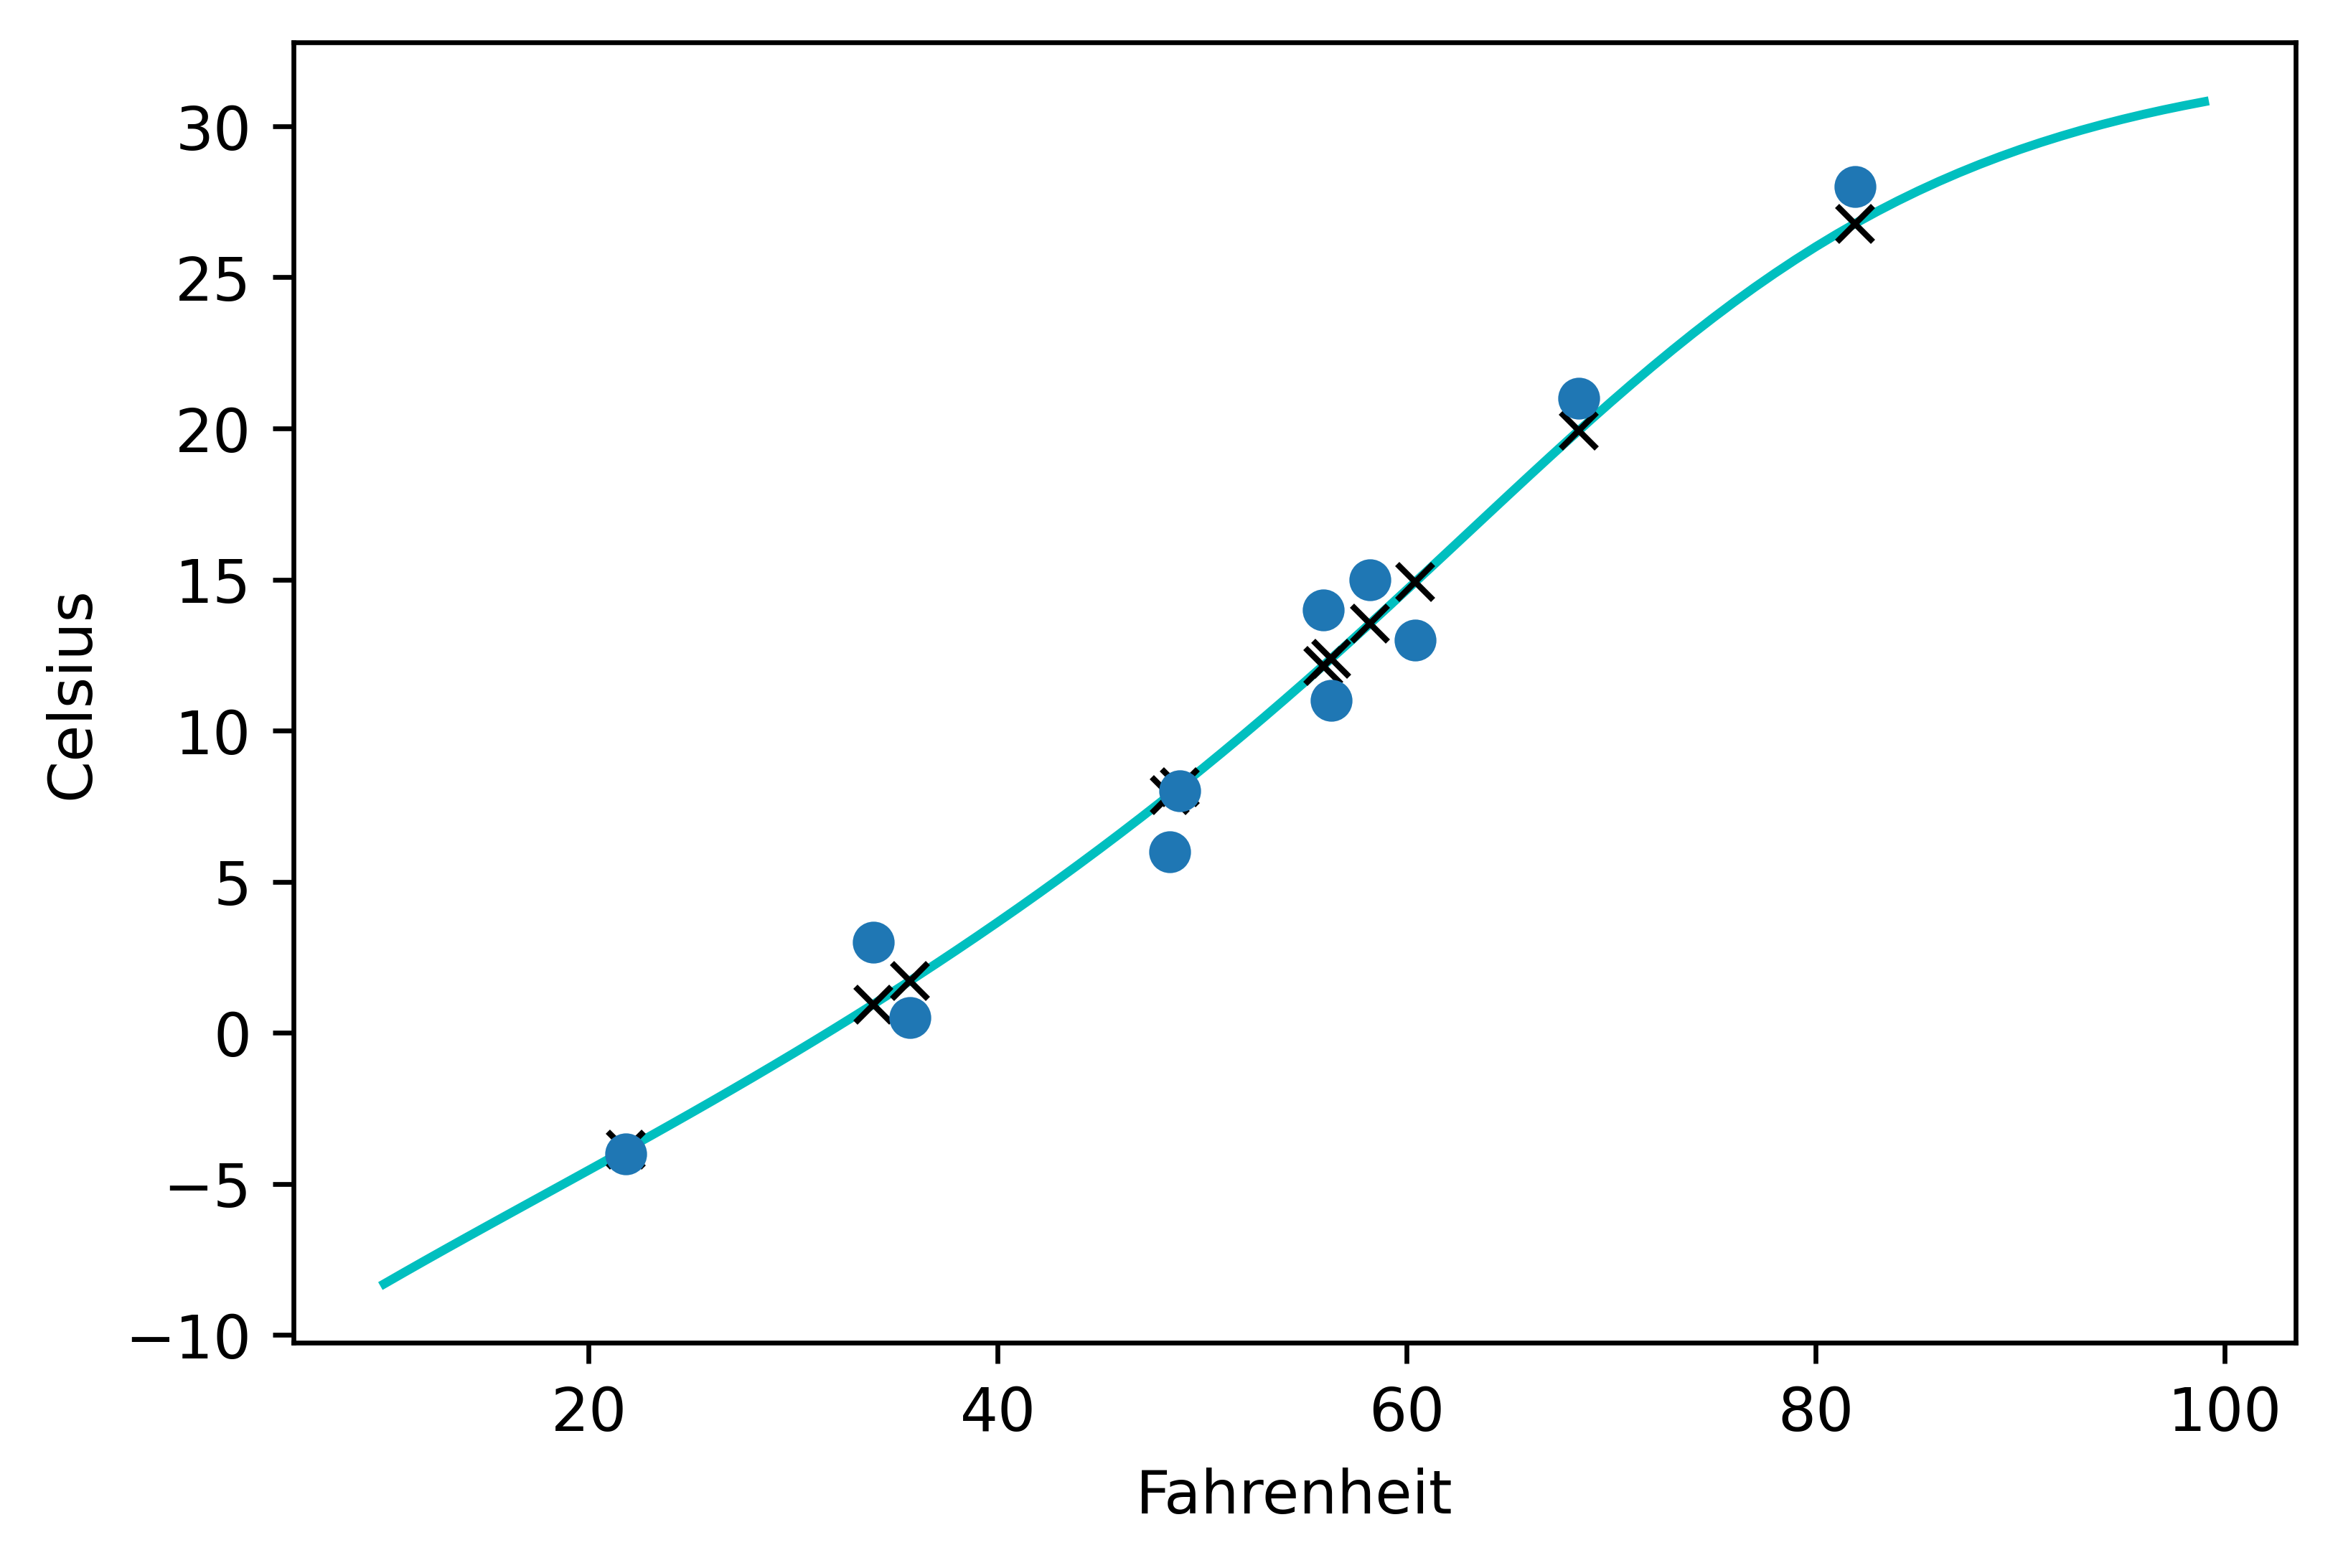

In [9]:
def training_loop(n_epochs, train_t_un, train_t_cel, val_t_un, val_t_cel, model, loss_fn, optimizer):

    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_un)
        train_loss = loss_fn(train_t_cel, train_t_p)
        with torch.no_grad():
            val_t_p = model(val_t_un)
            val_loss = loss_fn(val_t_cel, val_t_p)
            assert val_loss.requires_grad == False
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch % 1000 == 0 or epoch <= 3:
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}')
    
    fig = plt.figure(dpi=600)
    t_range = torch.arange(10., 100.).unsqueeze(1)
    plt.xlabel('Fahrenheit')
    plt.ylabel('Celsius')
    plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
    plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
    plt.plot(t_u.numpy(), t_cel.numpy(), 'o')
    #return list(model.parameters())
    print('output', model(val_t_un))
    print('answer', val_t_cel)
    print('hidden', seq_model[2].weight.grad)

optimizer = optim.SGD(seq_model.parameters(), lr = 1e-3)
training_loop(
    n_epochs=3000,
    train_t_un=train_t_un, train_t_cel=train_t_cel, val_t_un=val_t_un, val_t_cel=val_t_cel,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    optimizer=optimizer
)